# Lição de casa PSI5790 - Aula 11

Nome: Jean Carlos Mello Xavier Faria

Nusp: 11259628

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings; warnings.filterwarnings("ignore")
import tensorflow as tf; print(tf.__version__)
from keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

2.15.0


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print((x_train.shape, y_train.shape))
print((x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
((50000, 32, 32, 3), (50000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=y_train.shape[1])
base_model.trainable = False
data_augmentation = Sequential(
[RandomFlip("horizontal"), RandomRotation(0.1), RandomZoom(0.1)])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)
x = data_augmentation(x)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation=('sigmoid'))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 114s 76ms/step - loss: 0.6973 - accuracy: 0.7609 - val_loss: 0.3388 - val_accuracy: 0.8831
Epoch 2/20
1250/1250 [==============================] - 93s 75ms/step - loss: 0.5464 - accuracy: 0.8103 - val_loss: 0.3066 - val_accuracy: 0.8901
Epoch 3/20
1250/1250 [==============================] - 93s 75ms/step - loss: 0.5186 - accuracy: 0.8208 - val_loss: 0.2939 - val_accuracy: 0.8973
Epoch 4/20
1250/1250 [==============================] - 95s 76ms/step - loss: 0.5034 - accuracy: 0.8263 - val_loss: 0.2855 - val_accuracy: 0.8987
Epoch 5/20
1250/1250 [==============================] - 90s 72ms/step - loss: 0.4935 - accuracy: 0.8284 - val_loss: 0.2847 - val_accuracy: 0.9000
Epoch 6/20
1250/1250 [==============================] - 90s 72ms/step - loss: 0.4767 - accuracy: 0.8361 - val_loss: 0.2730 - val_accuracy: 0.9053
Epoch 7/20
1250/1250 [==============================] - 94s 75ms/step - loss: 0.4611 - accuracy: 0.8385 - val_loss: 0.2718 

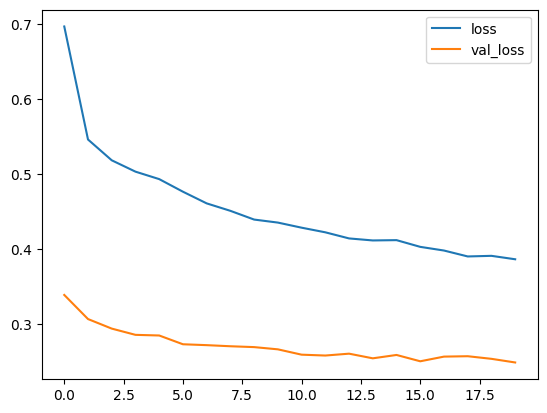

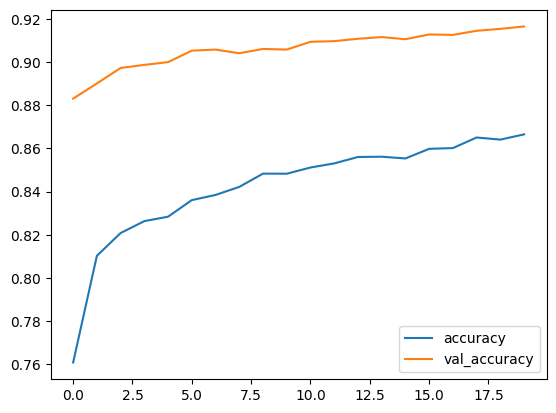

In [ ]:
def plot_history(history):
    history_frame = pd.DataFrame(history.history)
    history_frame.loc[:, ['loss', 'val_loss']].plot()
    history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
    return
plot_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc); print("Test loss", test_loss)

313/313 [==============================] - 17s 56ms/step - loss: 0.2644 - accuracy: 0.9108
Test accuracy 0.9107999801635742
Test loss 0.26442891359329224


In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, verbose=1)

Epoch 1/15
1250/1250 [==============================] - 350s 248ms/step - loss: 0.2661 - accuracy: 0.9083 - val_loss: 0.1549 - val_accuracy: 0.9476
Epoch 2/15
1250/1250 [==============================] - 308s 247ms/step - loss: 0.2018 - accuracy: 0.9317 - val_loss: 0.1410 - val_accuracy: 0.9538
Epoch 3/15
1250/1250 [==============================] - 312s 250ms/step - loss: 0.1720 - accuracy: 0.9407 - val_loss: 0.1306 - val_accuracy: 0.9563
Epoch 4/15
1250/1250 [==============================] - 312s 250ms/step - loss: 0.1550 - accuracy: 0.9458 - val_loss: 0.1209 - val_accuracy: 0.9616
Epoch 5/15
1250/1250 [==============================] - 312s 250ms/step - loss: 0.1358 - accuracy: 0.9538 - val_loss: 0.1182 - val_accuracy: 0.9614
Epoch 6/15
1250/1250 [==============================] - 312s 250ms/step - loss: 0.1225 - accuracy: 0.9563 - val_loss: 0.1178 - val_accuracy: 0.9625
Epoch 7/15
1250/1250 [==============================] - 309s 247ms/step - loss: 0.1155 - accuracy: 0.9603 - val_

313/313 [==============================] - 18s 56ms/step - loss: 0.1168 - accuracy: 0.9654
Test accuracy 0.965399980545044
Test loss 0.11682650446891785


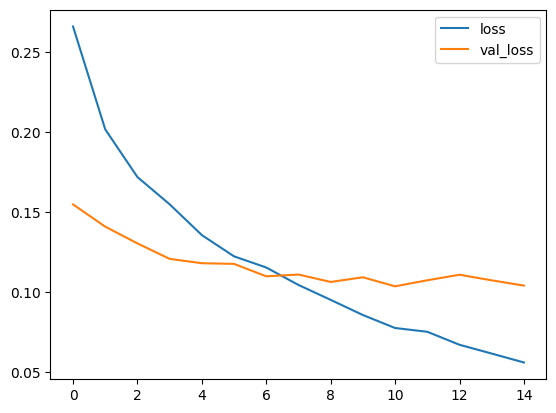

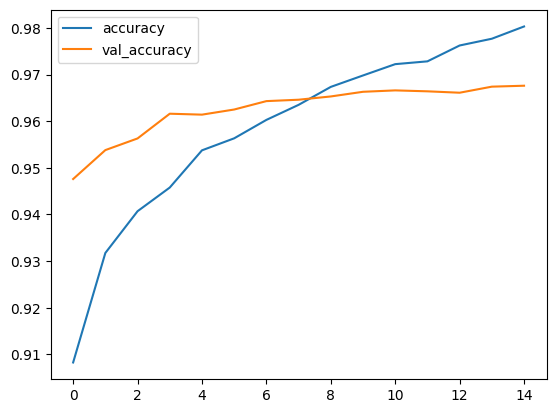

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc); print("Test loss", test_loss)
plot_history(history)

In [ ]:
model.save('efficient.h5')

313/313 [==============================] - 18s 52ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

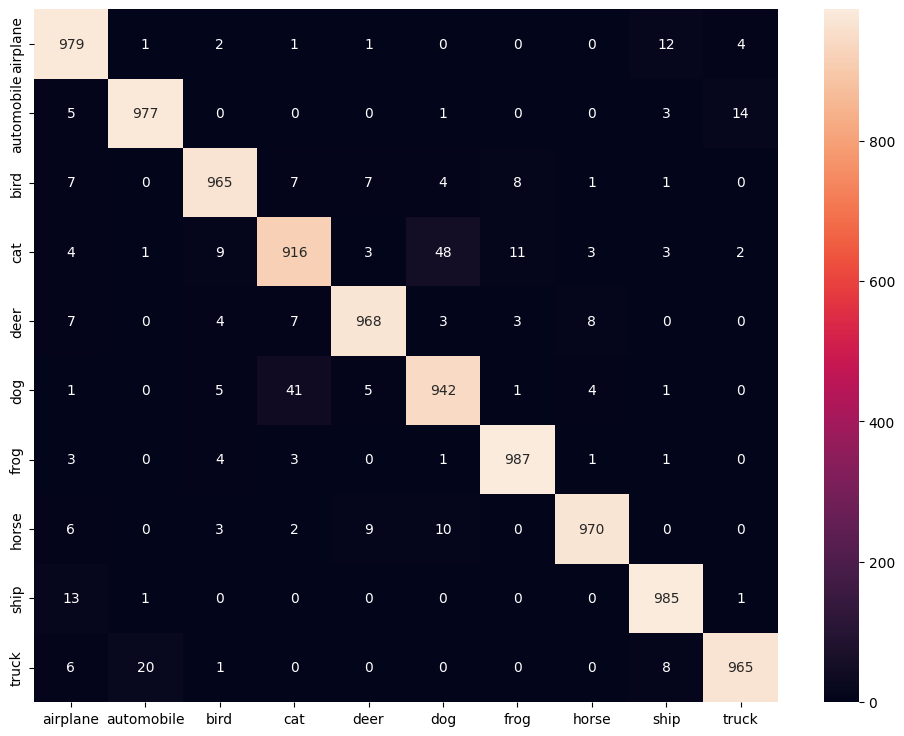

In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)